## Final Project Submission

Please fill out:
* Student name: Jillian Clark, Yuhkai Lin, John Sheehan
* Student pace: full time
* Scheduled project review date/time: 6/3/2022
* Instructor name: William and Daniel


## Buisness Understanding

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle

In [28]:
import os
import sqlite3

## Data Understanding

In [29]:
import sqlite3
import pandas as pd
import zipfile

# Extract IMDb SQL .db file
with zipfile.ZipFile('./zippedData/im.db.zip') as zipObj:
    # Extract all contents of .zip file into current directory
    zipObj.extractall(path='./zippedData/')
    
# Create connection to IMDb DB
con = sqlite3.connect('./zippedData/im.db')

In [30]:
#import data from rt.movie_info.tsv.gz
movie_info = pd.read_csv('./zippedData/rt.movie_info.tsv.gz',sep="\t")

In [31]:
#rt.reviews.tsv.gz
reviews = pd.read_csv('./zippedData/rt.reviews.tsv.gz',sep="\t", encoding = 'unicode_escape')

In [32]:
#bom.movie_gross.csv.gz
movie_gross = pd.read_csv('./zippedData/bom.movie_gross.csv.gz')

In [33]:
#tmdb.movies.csv.gz
tmdb = pd.read_csv('./zippedData/tmdb.movies.csv.gz')

In [34]:
#tn.movie_budgets.csv.gz
budgets = pd.read_csv('./zippedData/tn.movie_budgets.csv.gz')

In [35]:
movie_ratings = """
SELECT *
FROM movie_ratings
"""

pd.read_sql(movie_ratings, con)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [36]:
pd.read_sql(movie_ratings, con).describe()


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [37]:
q1 = """
SELECT *
FROM movie_ratings
JOIN movie_basics
    ON movie_ratings.movie_id = movie_basics.movie_id
ORDER BY averagerating DESC

"""

pd.read_sql(q1, con)

,movie_id,averagerating,numvotes,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt5390098,10.0,5,tt5390098,The Paternal Bond: Barbary Macaques,Atlas Mountain: Barbary Macaques - Childcaring...,2015,59.0,Documentary
1,tt6295832,10.0,5,tt6295832,Requiem voor een Boom,Requiem voor een Boom,2016,48.0,Documentary
2,tt1770682,10.0,5,tt1770682,Freeing Bernie Baran,Freeing Bernie Baran,2010,100.0,"Crime,Documentary"
3,tt2632430,10.0,5,tt2632430,Hercule contre Hermès,Hercule contre Hermès,2012,72.0,Documentary
4,tt8730716,10.0,5,tt8730716,Pick It Up! - Ska in the '90s,Pick It Up! - Ska in the '90s,2019,99.0,Documentary
...,...,...,...,...,...,...,...,...,...
73851,tt7926296,1.0,17,tt7926296,Nakhodka interneta,Nakhodka interneta,2017,162.0,Drama
73852,tt3235258,1.0,510,tt3235258,My First Love,Hatsukoi,2013,82.0,Drama
73853,tt7831076,1.0,96,tt7831076,"Yes, Sir! 7","Yes, Sir! 7",2016,111.0,"Comedy,Drama"
73854,tt3262718,1.0,223,tt3262718,Bye Bye Marrano,Bye Bye Marrano,2013,114.0,Drama


Joining movie basics and movie ratings tables to be able to compare movie gernes with ratings.

## Data Analysis 

Here we clean and analyze our data to help make our recomendations. 

In [38]:
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [39]:
#Examining movie_gross for nulls
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


The data in movie_gross stores foreign_gross as an object data type. 

In [40]:
#drop rows containing nulls in foreign_gross column
movie_gross_clean= movie_gross.dropna(subset=['foreign_gross'])

In [41]:
#change foreign_gross into a float type
movie_gross_clean['foreign_gross'] = movie_gross_clean['foreign_gross'].str.replace(",","").astype(float)
movie_gross_clean.head()

<ipython-input-41-261fdcc9ccea>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_gross_clean['foreign_gross'] = movie_gross_clean['foreign_gross'].str.replace(",","").astype(float)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [42]:
#Examining tmdb data for nulls
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [43]:
tmdb.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [44]:
#create a new column 'release_month' (string) with just the month 
tmdb['release_month'] = tmdb['release_date'].str[5:7]
tmdb.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,11
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,03
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,05
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,11
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,07


In [45]:
grouped_tmdb = tmdb.groupby('release_month')
grouped_tmdb.mean()

,Unnamed: 0,id,popularity,vote_average,vote_count
release_month,,,,,
01,12421.901980,289163.437101,2.180176,5.866762,65.612388
02,13681.524783,284874.361834,3.352600,5.958240,189.337670
03,14003.534497,289719.502909,3.052933,6.042810,168.189942
04,13902.661341,296493.706937,2.784293,6.117537,120.299299
05,13458.068633,293177.639678,3.123663,6.003539,230.502413
06,13376.954755,293923.416898,3.043683,6.067959,203.485688
07,13026.402261,291002.682846,3.585265,5.883710,304.916223
08,13138.877503,295222.210247,3.580677,5.908539,187.911661
09,13049.484099,296616.382067,3.265490,5.955300,167.389134


In [46]:
#examining the popularity statistics
grouped_tmdb['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
release_month,,,,,,,,
01,3132.0,2.180176,2.974335,0.6,0.60000,0.8830,2.17800,28.138
02,1614.0,3.352600,4.304551,0.6,0.62400,1.5130,4.55400,45.253
03,2406.0,3.052933,3.931685,0.6,0.60000,1.4000,3.77100,45.000
04,2566.0,2.784293,3.783140,0.6,0.60000,1.2410,3.25175,80.773
05,1865.0,3.123663,4.683931,0.6,0.60000,1.3470,3.59900,50.289
06,2166.0,3.043683,4.236429,0.6,0.60000,1.3565,3.38750,36.286
07,1504.0,3.585265,4.990946,0.6,0.62875,1.4000,4.77250,46.775
08,1698.0,3.580677,4.426682,0.6,0.60000,1.6020,5.42175,49.606
09,2264.0,3.265490,4.136450,0.6,0.60150,1.4000,4.38850,36.955


In [47]:
grouped_tmdb['popularity'].mean()

release_month
01    2.180176
02    3.352600
03    3.052933
04    2.784293
05    3.123663
06    3.043683
07    3.585265
08    3.580677
09    3.265490
10    3.081957
11    3.459795
12    3.922681
Name: popularity, dtype: float64

In [48]:
#looking for nulls in budgets 
budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [49]:
budgets.head()
#important metrics: domestic_gross, wordwide_gross, production_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [50]:
#function to remove the dollar sign and change value from string to a float

def money_string_to_float(df, column_name):
    df[column_name] = df[column_name].str[1:]
    df[column_name] = df[column_name].str.replace(',', '').astype(float)
    return df

money_string_to_float(budgets, "production_budget")
money_string_to_float(budgets, "domestic_gross")
money_string_to_float(budgets, "worldwide_gross")

budgets.head()
#do not run this again (write an exception)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [51]:
#create a new column foreign_gross that is the difference between worldwide_gross and domestic_gross
budgets['foreign_gross'] = budgets['worldwide_gross'] - budgets['domestic_gross']
#sort by foreign_gross descending
budgets['foreign_gross'].sort_values(ascending=False)
budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08


In [52]:
#add another column to budgets 'release_month'
budgets['release_month'] = budgets['release_date'].str[0:3]
budgets.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.0,0.0,Dec
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,240495.0,192013.0,Apr
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1338.0,0.0,Jul
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.0,0.0,Sep
5781,82,"Aug 5, 2005",My Date With Drew,1100.0,181041.0,181041.0,0.0,Aug


There are some rows with 0's for domestic_gross and worldwide_gross. We dropped these rows to focus on comparing gross between movies.

In [53]:
#how many instances of $0 do we have in our gross columns?
gross_zero = budgets[budgets['worldwide_gross'] == 0]
gross_zero.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367 entries, 194 to 5780
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 367 non-null    int64  
 1   release_date       367 non-null    object 
 2   movie              367 non-null    object 
 3   production_budget  367 non-null    float64
 4   domestic_gross     367 non-null    float64
 5   worldwide_gross    367 non-null    float64
 6   foreign_gross      367 non-null    float64
 7   release_month      367 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 25.8+ KB


In [54]:
budgets_clean = budgets.drop(budgets[budgets['worldwide_gross'] == 0].index)
budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec


We grouped our data by 'release_month'.

In [55]:
budgets_month = budgets_clean.groupby('release_month')
budgets_month.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
release_month,,,,,
Apr,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07
Aug,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07
Dec,50.156200,3.823086e+07,5.530613e+07,1.219991e+08,6.669292e+07
Feb,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07
Jan,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07
Jul,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07
Jun,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07
Mar,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07
May,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07


The data is grouped by month, but we wanted to have this in chronological order. The months are stored as strings of the abbreviated month name. In order to sort the data by chronological release month, we added another column associating the release_month with the number of that month.

In [56]:
#create a new column 'month_number'
months_dict = {'Jan':1, 'Feb':2, 'Mar':3, 'Apr':4, 'May':5, 'Jun':6, 'Jul':7, 'Aug':8, 'Sep':9, 'Oct':10, 'Nov':11, 'Dec':12}

month_num_list=[]
for month in budgets_clean['release_month']:
    month_num = months_dict[month] 
    month_num_list.append(month_num)
budgets_clean['month_number'] = month_num_list
budgets_clean.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12


Now we can group the 'budgets' dataframe by 'month_number' and take a look at some aggregation statistics for budget and gross.

In [57]:
#group by the month_number
budgets_month = budgets_clean.groupby('month_number')
budgets_month.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross
month_number,,,,,
1,49.591463,2.178006e+07,2.533694e+07,4.926112e+07,2.392418e+07
2,50.651351,2.919364e+07,3.752039e+07,7.579852e+07,3.827814e+07
3,49.822727,3.267950e+07,4.120296e+07,8.613110e+07,4.492814e+07
4,51.348730,2.479273e+07,2.865379e+07,6.282632e+07,3.417253e+07
5,50.358779,4.868485e+07,6.907396e+07,1.680485e+08,9.897459e+07
6,50.104575,4.484185e+07,6.869623e+07,1.487332e+08,8.003695e+07
7,49.884434,4.401758e+07,6.301966e+07,1.462830e+08,8.326333e+07
8,52.344609,2.645859e+07,3.373241e+07,6.394353e+07,3.021112e+07
9,48.381974,2.272352e+07,2.449119e+07,4.939912e+07,2.490793e+07


Here is some exploration of the gross columns for all three categories: domestic, worldwide, and foreign.

In [58]:
budgets_month['domestic_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,2.533694e+07,2.867713e+07,0.0,2380013.00,16204811.0,3.827525e+07,146336178.0
2,370.0,3.752039e+07,5.746583e+07,0.0,4050716.75,20267527.5,5.032184e+07,700059566.0
3,440.0,4.120296e+07,6.250563e+07,0.0,3484683.75,18733294.5,5.275792e+07,504014165.0
4,433.0,2.865379e+07,5.248817e+07,0.0,1224330.00,14249005.0,3.628070e+07,678815482.0
5,393.0,6.907396e+07,1.016921e+08,0.0,2956000.00,21540363.0,9.138720e+07,623279547.0
6,459.0,6.869623e+07,9.156077e+07,0.0,5007814.00,38311134.0,1.012066e+08,652270625.0
7,424.0,6.301966e+07,8.152030e+07,0.0,5768193.50,33034174.5,8.901194e+07,533720947.0
8,473.0,3.373241e+07,4.587340e+07,0.0,3100000.00,19184820.0,4.472664e+07,333172112.0
9,466.0,2.449119e+07,3.351091e+07,0.0,1490118.00,12799007.0,3.504984e+07,327481748.0


In [59]:
budgets_month['worldwide_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,4.926112e+07,6.691056e+07,673.0,4261841.75,24843762.0,7.068974e+07,5.175991e+08
2,370.0,7.579852e+07,1.238435e+08,3604.0,7929280.00,37849452.0,8.645606e+07,1.348258e+09
3,440.0,8.613110e+07,1.552561e+08,3234.0,7282899.00,28711776.5,9.263332e+07,1.259200e+09
4,433.0,6.282632e+07,1.616966e+08,527.0,4023741.00,22910563.0,6.417045e+07,2.048134e+09
5,393.0,1.680485e+08,2.595341e+08,528.0,6244618.00,35681080.0,2.550000e+08,1.517936e+09
6,459.0,1.487332e+08,2.258933e+08,1217.0,9401650.00,54876855.0,2.153745e+08,1.648855e+09
7,424.0,1.462830e+08,2.192839e+08,1338.0,10764080.75,58978298.0,1.748570e+08,1.341693e+09
8,473.0,6.394353e+07,9.897115e+07,401.0,5617460.00,26887177.0,8.068118e+07,7.708675e+08
9,466.0,4.939912e+07,7.634508e+07,1822.0,4244109.25,22336591.0,5.838477e+07,6.974580e+08


Minimum values of 0 in foreign gross tell us that some movies only had domestic sales.

In [60]:
budgets_month['foreign_gross'].describe()

,count,mean,std,min,25%,50%,75%,max
month_number,,,,,,,,
1,328.0,2.392418e+07,4.849461e+07,0.0,0.00,2709992.0,2.862173e+07,3.740705e+08
2,370.0,3.827814e+07,7.601360e+07,0.0,1657.00,8610522.0,4.084868e+07,6.481987e+08
3,440.0,4.492814e+07,9.786655e+07,0.0,8789.00,8584576.0,4.200565e+07,7.551855e+08
4,433.0,3.417253e+07,1.143279e+08,0.0,0.00,4615682.0,2.700038e+07,1.369319e+09
5,393.0,9.897459e+07,1.648751e+08,0.0,47469.00,11999999.0,1.382581e+08,9.440081e+08
6,459.0,8.003695e+07,1.422974e+08,0.0,54199.50,13556787.0,1.056281e+08,9.965842e+08
7,424.0,8.326333e+07,1.456406e+08,0.0,97116.75,19312855.5,9.546976e+07,9.605000e+08
8,473.0,3.021112e+07,5.933793e+07,0.0,0.00,3467655.0,3.433392e+07,4.376954e+08
9,466.0,2.490793e+07,4.857892e+07,0.0,12606.00,5310087.0,2.924530e+07,3.699762e+08


In [61]:
#take a look at the budgets_month dataframe with all of our added columns
budgets_month.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09,1.116649e+09,Dec,12
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,1.369319e+09,Apr,4
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.0,309420425.0,9.634204e+08,6.540000e+08,May,5
8,9,"Nov 17, 2017",Justice League,300000000.0,229024295.0,6.559452e+08,4.269209e+08,Nov,11
9,10,"Nov 6, 2015",Spectre,300000000.0,200074175.0,8.796209e+08,6.795467e+08,Nov,11


The budgets/gross data encompasses a wide range of years. To hone in on more recent market trends, we limited the range of years to the last 25 years. This also reduces the effect of inflation on our analysis.

In [62]:
#create a new column 'release_year' that contains the year as an int
#take a look at the data to find the oldest movie and most recent movie
budgets_clean['release_year'] = budgets_clean['release_date'].str[-4:].astype(int)
budgets_clean['release_year'].describe()

count    5415.000000
mean     2003.599446
std        12.546965
min      1915.000000
25%      1999.000000
50%      2006.000000
75%      2012.000000
max      2019.000000
Name: release_year, dtype: float64

The most recent movie released in 2019, and the oldest movie released in 1915. We can subset our 'budgets_clean' dataframe to work with movies from the last 25 years. 

In [63]:
#create a subset containing movies released in the last 25 years
budgets_recent = budgets_clean[budgets_clean['release_year'] >= 1997]
budgets_recent.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12,2017


With this recent release data subset, we can focus our analysis to provide recommendations based on modern movie productions.

In [64]:
budgets_recent_grouped = budgets_recent.groupby('month_number')
budgets_recent_grouped.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year
month_number,,,,,,
1,50.778195,2.485784e+07,2.746353e+07,5.684433e+07,2.938080e+07,2008.898496
2,50.498403,3.201040e+07,3.903213e+07,8.234195e+07,4.330982e+07,2008.530351
3,50.172775,3.565175e+07,4.183567e+07,9.013388e+07,4.829821e+07,2008.149215
4,50.384817,2.672459e+07,3.005665e+07,6.778824e+07,3.773159e+07,2008.057592
5,49.414557,5.526434e+07,7.182751e+07,1.806778e+08,1.088503e+08,2008.259494
6,50.023188,5.085091e+07,6.800196e+07,1.560863e+08,8.808437e+07,2008.188406
7,49.578947,4.829000e+07,6.502817e+07,1.568013e+08,9.177312e+07,2007.850877
8,52.733503,2.910880e+07,3.508588e+07,6.919715e+07,3.411127e+07,2007.459391
9,48.431373,2.383433e+07,2.408086e+07,5.048054e+07,2.639968e+07,2007.909314


In [39]:
budgets_recent_grouped.median()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year
month_number,,,,,,
1,48.0,19000000.0,18504178.5,34035337.5,10799881.0,2009.0
2,48.0,22000000.0,22958583.0,43528634.0,13148626.0,2008.0
3,51.0,20000000.0,18626949.0,29437906.0,10216031.5,2008.0
4,51.0,18000000.0,14250917.5,23910786.0,6255147.0,2008.0
5,48.5,21500000.0,21506024.0,38166202.5,14011502.5,2008.5
6,49.0,27000000.0,32267774.0,55443032.0,20110271.0,2008.0
7,49.0,25500000.0,32187940.5,65710949.0,23726380.5,2008.0
8,51.0,20000000.0,19585998.5,32957655.5,7759159.5,2008.0
9,46.0,18000000.0,12295033.0,22903867.0,7075485.5,2008.0


While we are starting to see how gross might relate to release month, we can deepen our analysis by relating gross to the production budget. Dividing the difference of 'worldwide_gross' and 'production_budget' by the 'production_budget' created a Return of Investment (ROI) measure. 

In [65]:
budgets_recent['roi'] = (budgets_recent['worldwide_gross'] - budgets_recent['production_budget'])/ budgets_recent['production_budget']
budgets_recent.head()

<ipython-input-65-ba931a3f6c0c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_recent['roi'] = (budgets_recent['worldwide_gross'] - budgets_recent['production_budget'])/ budgets_recent['production_budget']


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_month,month_number,release_year,roi
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09,2.015838e+09,Dec,12,2009,5.532577
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,8.046000e+08,May,5,2011,1.546673
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08,1.070000e+08,Jun,6,2019,-0.572108
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,9.440081e+08,May,5,2015,3.243841
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,6.965404e+08,Dec,12,2017,3.153696


In [66]:
budgets_recent_grouped = budgets_recent.groupby('month_number')
budgets_recent_grouped.mean()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year,roi
month_number,,,,,,,
1,50.778195,2.485784e+07,2.746353e+07,5.684433e+07,2.938080e+07,2008.898496,2.433787
2,50.498403,3.201040e+07,3.903213e+07,8.234195e+07,4.330982e+07,2008.530351,2.158301
3,50.172775,3.565175e+07,4.183567e+07,9.013388e+07,4.829821e+07,2008.149215,1.952068
4,50.384817,2.672459e+07,3.005665e+07,6.778824e+07,3.773159e+07,2008.057592,2.475835
5,49.414557,5.526434e+07,7.182751e+07,1.806778e+08,1.088503e+08,2008.259494,3.677979
6,50.023188,5.085091e+07,6.800196e+07,1.560863e+08,8.808437e+07,2008.188406,2.632261
7,49.578947,4.829000e+07,6.502817e+07,1.568013e+08,9.177312e+07,2007.850877,5.079124
8,52.733503,2.910880e+07,3.508588e+07,6.919715e+07,3.411127e+07,2007.459391,2.821716
9,48.431373,2.383433e+07,2.408086e+07,5.048054e+07,2.639968e+07,2007.909314,2.973319


In [67]:
budgets_recent_grouped.median()

,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,release_year,roi
month_number,,,,,,,
1,48.0,19000000.0,18504178.5,34035337.5,10799881.0,2009.0,0.634626
2,48.0,22000000.0,22958583.0,43528634.0,13148626.0,2008.0,0.853915
3,51.0,20000000.0,18626949.0,29437906.0,10216031.5,2008.0,0.605754
4,51.0,18000000.0,14250917.5,23910786.0,6255147.0,2008.0,0.455148
5,48.5,21500000.0,21506024.0,38166202.5,14011502.5,2008.5,0.862121
6,49.0,27000000.0,32267774.0,55443032.0,20110271.0,2008.0,1.182908
7,49.0,25500000.0,32187940.5,65710949.0,23726380.5,2008.0,1.173989
8,51.0,20000000.0,19585998.5,32957655.5,7759159.5,2008.0,0.650968
9,46.0,18000000.0,12295033.0,22903867.0,7075485.5,2008.0,0.352838


In [40]:
pd.read_sql(q1, con).describe()

,averagerating,numvotes,start_year,runtime_minutes
count,73856.000000,7.385600e+04,73856.000000,66236.000000
mean,6.332729,3.523662e+03,2014.276132,94.654040
std,1.474978,3.029402e+04,2.614807,208.574111
min,1.000000,5.000000e+00,2010.000000,3.000000
25%,5.500000,1.400000e+01,2012.000000,81.000000
50%,6.500000,4.900000e+01,2014.000000,91.000000
75%,7.400000,2.820000e+02,2016.000000,104.000000
max,10.000000,1.841066e+06,2019.000000,51420.000000


Looking at the mean and median for number of votes. I used this as a way to eliminate movies with so few votes. I utilized the median number of votes to filter (49) due to large range in data. I decided to look at the top 50 and bottom 50 rated films to see which genres were most represented in the highest and lowest rated films.



In [41]:
q2 = """
SELECT genres
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
WHERE numvotes > 49
ORDER BY averagerating ASC
LIMIT 50

"""
pd.read_sql(q2, con) 

##selecting 50 lowest rated movies with over 49 votes

,genres
0,"Drama,Romance"
1,Drama
2,Comedy
3,"Fantasy,Mystery,Romance"
4,Horror
5,"Adventure,Animation,Family"
6,None
7,Drama
8,Horror
9,Drama


In [42]:
bottom_genres = pd.read_sql(q2, con) 

In [43]:
bottom_genres

,genres
0,"Drama,Romance"
1,Drama
2,Comedy
3,"Fantasy,Mystery,Romance"
4,Horror
5,"Adventure,Animation,Family"
6,None
7,Drama
8,Horror
9,Drama


In [44]:
bottom_genres_split= bottom_genres.genres.str.split(',')

Splitting the columns that have multiple genres by "," so that each genre can be counted individually.

In [45]:
bottom_genres_split

0                   [Drama, Romance]
1                            [Drama]
2                           [Comedy]
3        [Fantasy, Mystery, Romance]
4                           [Horror]
5     [Adventure, Animation, Family]
6                               None
7                            [Drama]
8                           [Horror]
9                            [Drama]
10                          [Comedy]
11                           [Drama]
12           [Action, Drama, Horror]
13                           [Drama]
14                       [Adventure]
15    [Adventure, Biography, Comedy]
16                     [Documentary]
17                          [Family]
18                   [Drama, Family]
19                          [Comedy]
20                   [Comedy, Drama]
21                          [Comedy]
22                         [Romance]
23                           [Drama]
24                           [Drama]
25                          [Comedy]
26                   [Comedy, Drama]
2

In [46]:
bottom_genres_split.drop(labels=[6], inplace=True)


Dropping the row that does not have a genre listed.

In [47]:
bottom_genres_split

0                   [Drama, Romance]
1                            [Drama]
2                           [Comedy]
3        [Fantasy, Mystery, Romance]
4                           [Horror]
5     [Adventure, Animation, Family]
7                            [Drama]
8                           [Horror]
9                            [Drama]
10                          [Comedy]
11                           [Drama]
12           [Action, Drama, Horror]
13                           [Drama]
14                       [Adventure]
15    [Adventure, Biography, Comedy]
16                     [Documentary]
17                          [Family]
18                   [Drama, Family]
19                          [Comedy]
20                   [Comedy, Drama]
21                          [Comedy]
22                         [Romance]
23                           [Drama]
24                           [Drama]
25                          [Comedy]
26                   [Comedy, Drama]
27                          [Horror]
2

In [48]:
q3 = """
SELECT genres
FROM movie_basics
LEFT JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
AND numvotes > 49
ORDER BY averagerating DESC
LIMIT 50

"""
pd.read_sql(q3, con) 

##selecting 50 highest rated movies with over 49 votes

,genres
0,Drama
1,"Comedy,Drama"
2,Drama
3,Documentary
4,"Adventure,Biography,Documentary"
5,"Documentary,Drama,Music"
6,"Biography,Drama,History"
7,Drama
8,"Comedy,Drama,Family"
9,Comedy


In [49]:
top_genres = pd.read_sql(q3, con) 

In [50]:
top_genres_split= top_genres.genres.str.split(',')

Splitting the columns that have multiple genres by "," so that each genre can be counted individually.

In [51]:
top_genres_split

0                                 [Drama]
1                         [Comedy, Drama]
2                                 [Drama]
3                           [Documentary]
4     [Adventure, Biography, Documentary]
5             [Documentary, Drama, Music]
6             [Biography, Drama, History]
7                                 [Drama]
8                 [Comedy, Drama, Family]
9                                [Comedy]
10                               [Action]
11                            [Biography]
12                [Comedy, Drama, Family]
13                       [Drama, History]
14                   [Documentary, Music]
15                          [Documentary]
16                          [Documentary]
17                                [Drama]
18                          [Documentary]
19                                [Drama]
20                          [Documentary]
21                          [Documentary]
22               [Comedy, Drama, Musical]
23                          [Docum

In [52]:
def get_genre_counts (genres_split):
    
    genre_counts = {
        "Documentary": 0,
        "Drama": 0,
        "Music": 0,
        "Comedy": 0,
        "Family" : 0,
        "Romance" : 0,
        "Adventure" : 0,
        "Biography" : 0,
        "History" : 0,
        "Musical" : 0,
        "Sport" : 0,
        "Action" : 0,
        "Fantasy" : 0,
        "Mystery" : 0,
        "Horror" : 0,
        "Animation" : 0,
        "Thriller" : 0,
        "Sci-Fi": 0,
        "Crime": 0,
        "War" : 0,
        "Western" :0,
    }


    for genre in genres_split:
        for item in genre:
            genre_counts[item] +=1
    return genre_counts

Created a function that will return the counts of each genre.

In [53]:
get_genre_counts (top_genres_split)

{'Documentary': 32,
 'Drama': 16,
 'Music': 3,
 'Comedy': 7,
 'Family': 3,
 'Romance': 1,
 'Adventure': 2,
 'Biography': 5,
 'History': 3,
 'Musical': 1,
 'Sport': 2,
 'Action': 2,
 'Fantasy': 0,
 'Mystery': 0,
 'Horror': 0,
 'Animation': 0,
 'Thriller': 0,
 'Sci-Fi': 0,
 'Crime': 1,
 'War': 1,
 'Western': 0}

In [54]:
get_genre_counts (bottom_genres_split)

{'Documentary': 2,
 'Drama': 19,
 'Music': 1,
 'Comedy': 17,
 'Family': 3,
 'Romance': 8,
 'Adventure': 4,
 'Biography': 1,
 'History': 1,
 'Musical': 0,
 'Sport': 0,
 'Action': 3,
 'Fantasy': 2,
 'Mystery': 1,
 'Horror': 6,
 'Animation': 1,
 'Thriller': 1,
 'Sci-Fi': 2,
 'Crime': 1,
 'War': 1,
 'Western': 1}

In [55]:
top_genre_counts = (get_genre_counts (top_genres_split))

In [56]:
top_genre_counts_df = pd.DataFrame.from_dict(top_genre_counts, orient='index')

In [57]:
top_genre_counts_df

,0
Documentary,32
Drama,16
Music,3
Comedy,7
Family,3
Romance,1
Adventure,2
Biography,5
History,3
Musical,1


In [58]:
bottom_genre_counts = (get_genre_counts (bottom_genres_split))

In [59]:
bottom_genre_counts_df = pd.DataFrame.from_dict(bottom_genre_counts, orient='index')

In [60]:
bottom_genre_counts_df

,0
Documentary,2
Drama,19
Music,1
Comedy,17
Family,3
Romance,8
Adventure,4
Biography,1
History,1
Musical,0


In [61]:
bottom_genre_counts_df.sort_values([0], ascending=False, inplace=True)

Ordering my data frame in descending order so when I graph the data frame, the bars will go in descending order.

In [62]:
bottom_genre_counts_df

,0
Drama,19
Comedy,17
Romance,8
Horror,6
Adventure,4
Family,3
Action,3
Documentary,2
Sci-Fi,2
Fantasy,2


In [63]:
bottom_genre_counts_df = bottom_genre_counts_df.loc[~(bottom_genre_counts_df==0).all(axis=1)]



Removing genres that have a count of "0".

In [64]:
bottom_genre_counts_df

,0
Drama,19
Comedy,17
Romance,8
Horror,6
Adventure,4
Family,3
Action,3
Documentary,2
Sci-Fi,2
Fantasy,2


In [65]:
bottom_genre_counts_df.reset_index(inplace=True)

In [66]:
bottom_genre_counts_df

,index,0
0,Drama,19
1,Comedy,17
2,Romance,8
3,Horror,6
4,Adventure,4
5,Family,3
6,Action,3
7,Documentary,2
8,Sci-Fi,2
9,Fantasy,2


In [67]:
bottom_genre_counts_df = bottom_genre_counts_df.rename(columns={'index': 'Genre'})

In [68]:
bottom_genre_counts_df

,Genre,0
0,Drama,19
1,Comedy,17
2,Romance,8
3,Horror,6
4,Adventure,4
5,Family,3
6,Action,3
7,Documentary,2
8,Sci-Fi,2
9,Fantasy,2


In [69]:
top_genre_counts_df = top_genre_counts_df.loc[~(top_genre_counts_df==0).all(axis=1)]


Removing genres that have a count of "0".

In [70]:
top_genre_counts_df

,0
Documentary,32
Drama,16
Music,3
Comedy,7
Family,3
Romance,1
Adventure,2
Biography,5
History,3
Musical,1


In [71]:
top_genre_counts_df.sort_values([0], ascending=False, inplace=True)

<ipython-input-71-3d0f4268893c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_genre_counts_df.sort_values([0], ascending=False, inplace=True)


Ordering my data frame in descending order so when I graph the data frame, the bars will go in descending order.

In [72]:
top_genre_counts_df

,0
Documentary,32
Drama,16
Comedy,7
Biography,5
Music,3
Family,3
History,3
Adventure,2
Sport,2
Action,2


In [73]:
top_genre_counts_df = top_genre_counts_df.reset_index()

In [74]:
top_genre_counts_df

,index,0
0,Documentary,32
1,Drama,16
2,Comedy,7
3,Biography,5
4,Music,3
5,Family,3
6,History,3
7,Adventure,2
8,Sport,2
9,Action,2


In [75]:
top_genre_counts_df = top_genre_counts_df.rename(columns={'index': 'Genre'})

In [76]:
top_genre_counts_df

,Genre,0
0,Documentary,32
1,Drama,16
2,Comedy,7
3,Biography,5
4,Music,3
5,Family,3
6,History,3
7,Adventure,2
8,Sport,2
9,Action,2


In [77]:
bottom_genre_counts_df

,Genre,0
0,Drama,19
1,Comedy,17
2,Romance,8
3,Horror,6
4,Adventure,4
5,Family,3
6,Action,3
7,Documentary,2
8,Sci-Fi,2
9,Fantasy,2


## Data Visualizations

Using the tmdb data, we plotted the popularity score against month to see if any month had more popular movies overall.

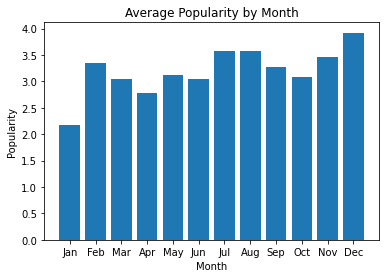

In [69]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, ax = plt.subplots()
ax.bar(months, grouped_tmdb['popularity'].mean())
ax.set_title('Average Popularity by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Popularity');

December movies had the highest average popularity score with June's and July's as almost identical runner-ups.

Another aspect to consider for a movie's release month is the quantity of movies released during that month. This can provide some insight into how popular certain months are and how much competition a movie might have during its release.


In [75]:
month_count_dict = {'Jan':0, 'Feb':0, 'Mar':0, 'Apr':0, 'May':0, 'Jun':0, 'Jul':0, 'Aug':0, 'Sep':0, 'Oct':0, 'Nov':0, 'Dec':0}

for month in budgets_recent['release_month']:
    month_count_dict[month] += 1
month_count_dict

{'Jan': 266,
 'Feb': 313,
 'Mar': 382,
 'Apr': 382,
 'May': 316,
 'Jun': 345,
 'Jul': 342,
 'Aug': 394,
 'Sep': 408,
 'Oct': 462,
 'Nov': 378,
 'Dec': 491}

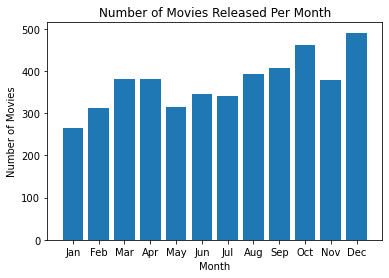

In [76]:
fig,ax = plt.subplots()

ax.bar(month_count_dict.keys(), month_count_dict.values())
ax.set_title('Number of Movies Released Per Month')
ax.set_xlabel('Month')
ax.set_ylabel("Number of Movies");


Again, December stands out with the greatest number of movie releases. The other 6 months with the most releases are October, September, August, April, and March.

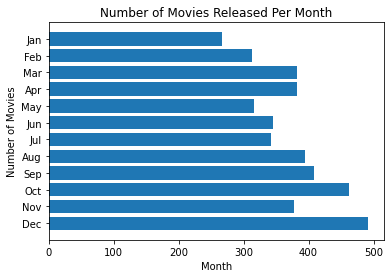

In [77]:
#same data as the graph above, just plotted horizontally
fig,ax = plt.subplots()

months = list(month_count_dict.keys())
movies_count = list(month_count_dict.values())

months.reverse()
movies_count.reverse()

ax.barh(months, movies_count)
ax.set_title('Number of Movies Released Per Month')
ax.set_xlabel('Month')
ax.set_ylabel("Number of Movies");

The following stacked bar chart takes our budget/gross dataset and plots the mean gross values grouped by month. A month with a greater mean/median movie gross could indicate more consumers are watching movies during that time.

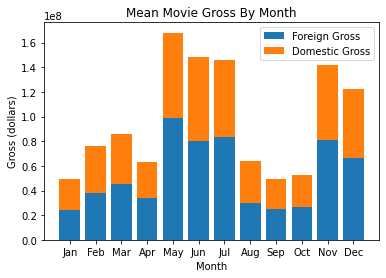

In [78]:
#plotting foreign and domestic growth by month as a stacked bar chart
months = list(month_count_dict.keys())

domestic_gross_mean = budgets_month['domestic_gross'].mean()
foreign_gross_mean = budgets_month['foreign_gross'].mean()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_mean, label='Foreign Gross')
ax.bar(months, domestic_gross_mean, bottom=foreign_gross_mean, label='Domestic Gross')

ax.set_title("Mean Movie Gross By Month")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (dollars)")

ax.legend();


Graphing the same data limited to movies released in the past 25 years revealed similar trends.

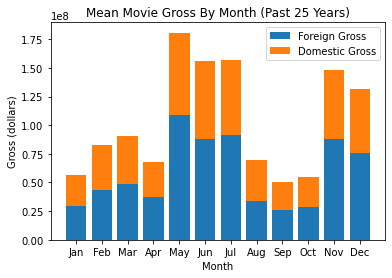

In [79]:
domestic_gross_mean = budgets_recent_grouped['domestic_gross'].mean()
foreign_gross_mean = budgets_recent_grouped['foreign_gross'].mean()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_mean, label='Foreign Gross')
ax.bar(months, domestic_gross_mean, bottom=foreign_gross_mean, label='Domestic Gross')

ax.set_title("Mean Movie Gross By Month (Past 25 Years)")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (dollars)")

ax.legend();

The similarity between the mean and median charts indicates that the mean movie gross is weighted heavily by releases from the past 25 years. May had the strongest performing movies, followed closely by June, July, and November. December lagged behind the front-runner months but still stood significantly above the remaining months.

We also graphed the median movie gross grouped by month. Using the median reduces the effect of super-performer movies such as "Avatar". This can give us a better look at how an "average" movie might perform in a given release window.

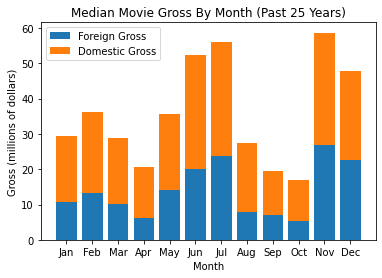

In [80]:
#median movie data from the past 25 years 
#plotted as a stacked bar chart of foreign and domestic gross

domestic_gross_median = budgets_recent_grouped['domestic_gross'].median()
foreign_gross_median = budgets_recent_grouped['foreign_gross'].median()

fig, ax = plt.subplots()

ax.bar(months, foreign_gross_median, label='Foreign Gross')
ax.bar(months, domestic_gross_median, bottom=foreign_gross_median, label='Domestic Gross')

ax.set_title("Median Movie Gross By Month (Past 25 Years)")
ax.set_xlabel("Month")
ax.set_ylabel("Gross (millions of dollars)")

#function to format y-axis out of scientific notation
def format_number(data_value, idx):
    formatter = '{:1.0f}'.format(data_value*0.000001)
    return formatter
plt.yticks(np.arange(0, 70_000_000, 10_000_000))
ax.yaxis.set_major_formatter(format_number)

ax.legend();



May was the most strongly affected by using the median instead of the mean. This indicates that May had some outlier movies with high gross. The median could be a better metric for a fledgling movie studio. June, July, November, and December also had high mean gross, a trend reflected by the median gross as well. Based on this analysis, we could say that movies releasing in these 4 months generally experienced the best gross performance.

Now that we've looked at trends in gross data, we added in budget as another variable for consideration. Return on investment (ROI) here was calculated as the difference between gross and budget, divided by the budget. This provided a ratio of movie profits versus movie costs. Similarly to the gross plots, the mean and median ROI for movies grouped by release month were plotted.

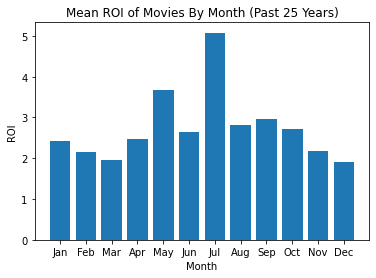

In [82]:
roi_mean = budgets_recent_grouped['roi'].mean()

fig, ax = plt.subplots()

ax.bar(months, roi_mean)

ax.set_title("Mean ROI of Movies By Month (Past 25 Years)")
ax.set_xlabel("Month")
ax.set_ylabel("ROI");

July stands out above the rest with a mean ROI of 5.07. The month with the second greatest mean ROI is May at 3.68.

After plotting the median ROI of movies against their release month, we saw how ROI is greatly affected by overperformers.

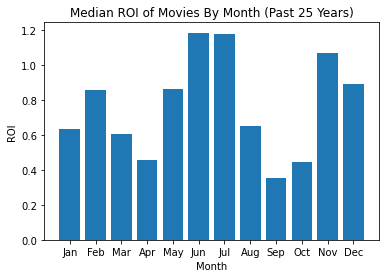

In [84]:
roi_median = budgets_recent_grouped['roi'].median()

fig, ax = plt.subplots()

ax.bar(months, roi_median)

ax.set_title("Median ROI of Movies By Month (Past 25 Years)")
ax.set_xlabel("Month")
ax.set_ylabel("ROI");

The greatest median ROI of movies based on month was 1.18, lower than any value of the mean ROIs. The difference between the means and medians reflects how uncertain the movie market is. Movies that excel can return great profits but are not the norm. Only three months had median ROIs that surpassed the break-even ratio of 1.0.  Here we see the best performing months match those highlighted in our median gross by month analysis. June, July, November, and December return as the best performers.

After our analysis of movies based on their release months, we concluded that there are clear months in which movies displayed better financial performance.

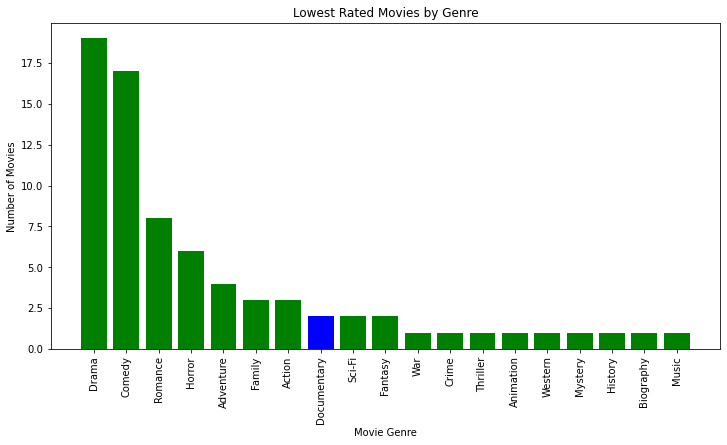

In [85]:
fig, ax = plt.subplots(figsize=(12,6))

ax.bar(x=bottom_genre_counts_df['Genre'], height=bottom_genre_counts_df[0], color=['green', 'green', 'green', 'green', 'green', 'green', 'green', 'blue', 'green', 'green', 'green', 'green', 'green', 'green'])
plt.xticks(rotation = 90)
plt.title('Lowest Rated Movies by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies');

plt.savefig('lowest_genre_graph.png', bbox_inches = "tight", dpi=300)

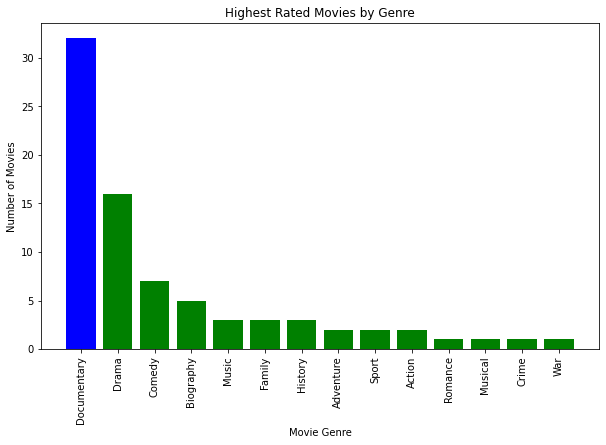

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x=top_genre_counts_df['Genre'], height=top_genre_counts_df[0], color=['blue', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green', 'green'])
plt.xticks(rotation = 90)
plt.title('Highest Rated Movies by Genre')
plt.xlabel('Movie Genre')
plt.ylabel('Number of Movies');

plt.savefig('highest_genre_graph.png', bbox_inches = "tight", dpi=300)


I plotted the movie counts for the 50 top rated movies to show that Documentary was the genre with the highest movie count. I also plotted the movie countws for the 50 lowest reated movies to show that Documentaries were not as common in the lowest rated movies.

## Conclusion

Given our analysis, we recommend producing Documentaries $150-$200 million budget. If we are looking to producde a Blockbuster, we should look to release our films in June, July, November, and December. If we are not looking to compete with Blockbusters, we recommend releasing in the "off months."
